# Stock Price Prediction

## 1. Problem Definition

Stock trading is always an attractive and interesting investment channel for a lot of people.
However, predicting the trend of stock and identify the best time to buy, sell or hold stocks is
always a very tricky traditional question. Many people, from generation to generation, have tried
to solve this problem. People have tried a lot to find a pattern in stock price as well as a general
equation for stock’s trend. However, it is so difficult because stock price is dependent to many
factors from macro economy, international economy, news... to stock trading history price and
the company’s health itself.

There are 2 famous traditional methods in financial field to analysis stock trend: fundamental
analysis which concentrates on the company’s heath ratio and technical analysis which doesn’t
care about the company’s health but concentrates on the stock trading history to find the trend
pattern. Each method can be successful with some stocks but failed for others. Until now, a lot of
people in stock trading environment still use these 2 methods as a reference for their stock trading
decision but the effectiveness of those methods is still a big question.

With the developing of ML, there are some studies on applying machine learning on stock trend
predicting but all of them just concentrated on stock price history, some reported on the
sentiment analysis on stock trading but there is no holistic view and approach to study all affected
factors to stock market and study about them. And so far, there is no report about applying these
studies in real-life stock trading.

Therefore, finding a holistic solution that combines fundamental analysis, technical analysis,
related factors, stock price history and machine learning in order to produce a powerful model
and tool to predict stock trend is the big challenge we want to address in this project.

## 2. Business Understanding

By collecting all data sources from financial news, reviews, social media, domestic economy
indicators, international economy indicator, market indicator, stock price history, stock
fundamental ratio and then apply machine learning techniques including text mining, sentiment
analysis, time series process and classification models, the project tries to implement a
holistic solution to solve the stock prediction problem and build a high performance model that can be used for stock trading.

We are going to use financial news and social media comments to mine sentiment analysis as a time series process. The sentiment analysis will be added features to stocks technical indicators. By collecting all data sources from financial news, reviews, social media, domestic economy
indicators, international economy indicator, market indicator, stock price history, stock
fundamental ratio and then apply machine learning techniques including text mining, sentiment
analysis, time series process and classification models, the project is promising implement a
holistic solution to solve the stock prediction problem and build up a model with high
performance to apply in stock trading application.

Using this approach for feature generation we hope to have capture most factors tat could influence stock prices.

Besides technical analysis we are also going to present meaningful data that can be used as reference in the decision making process.

## 3. Data Collection

### a) Twitter Web Scraper

Our Twitter web scraper is using __"pattern"__ library to get data from Twitter and apply sentiment analysis to tweets collected online. __"Pattern"__ is a very versatile library that, beside sentiment analysis also has interfaces to major web entities. It can be very useful when scraping data. The library outputs two indicators related to sentiment analysis. First indicator is the sentiment - a value ranging between -1 and +1 for negative/ positive sentiment. Second indicator is subjectivity - a value ranging between 0 and 1.

In [1]:
from __future__ import print_function
from __future__ import unicode_literals

from builtins import str, bytes, dict, int
from builtins import range

from pattern.web import Twitter, hashtags
from pattern.db import Datasheet, pprint, pd
from pattern.en import sentiment, polarity, subjectivity, positive

try:
    # We'll store tweets in a Datasheet.
    # A Datasheet is a table of rows and columns that can be exported as a CSV-file.
    # In the first column, we'll store a unique id for each tweet.
    # We only want to add the latest tweets, i.e., those we haven't seen yet.
    # With an index on the first column we can quickly check if an id already exists.
    # The pd() function returns the parent directory of this script + any given path.
    table = Datasheet.load(pd("tweets.csv"))
    index = set(table.columns[0])
except:
    table = Datasheet()
    index = set()

engine = Twitter(language="en")

prev = None

counter = 0
#set the counter to 1 - this will give us only one tweet as and example
while counter < 1:

    counter += 1
#normally we will have to wait between queries because Twitter will not accept more than a 
#certain number of queries per hour
#    time.sleep(60)
    for tweet in engine.search("#AAPL", start=prev, count=10, cached=False):
#        print(tweet.id)
#        print(tweet.text)
#        print(tweet.date)
        tweet_sentiment = sentiment(tweet.text)
        print("Sentiment for tweet ID: ", tweet.id, " is ", tweet_sentiment)
        
        if len(table) == 0 or tweet.id not in index:
             
            table.append([tweet.id, tweet.date, tweet.text, tweet_sentiment])
            index.add(tweet.id)
            
        prev = tweet.id

Sentiment for tweet ID:  1084521569177735168  is  (0.25, 0.3333333333333333)
Sentiment for tweet ID:  1084518534648979456  is  (0.2, 0.5)
Sentiment for tweet ID:  1084518004644286467  is  (0.0, 0.1)
Sentiment for tweet ID:  1084497440500301825  is  (0.26666666666666666, 0.7666666666666666)
Sentiment for tweet ID:  1084494232897826816  is  (0.2305194805194805, 0.4005952380952381)
Sentiment for tweet ID:  1084492032905805824  is  (0.125, 0.625)
Sentiment for tweet ID:  1084491007805272064  is  (0.0, 0.0)
Sentiment for tweet ID:  1084490689952522241  is  (0.2, 0.45)
Sentiment for tweet ID:  1084489825288364032  is  (0.25, 0.55)
Sentiment for tweet ID:  1084465051816333312  is  (0.2305194805194805, 0.4005952380952381)


### b) Nasdaq News Scraper

Unlike Twitter Nasdaq will let you scrape data at high frequency but the downside is that if you ask for too much data at relatively high frequency you will get banned from scraping Nasdaq data (we've learned this the hard way). The only solution to this is use a VPN that will allow you to change your IP address in case you get banned.

We used the __"BeatifulSoup"__ package to get news articles from Nasdaq then, after inspecting the article in a web browser, we extracted only the parts that were interesting for us.

Once the text has been extracted we used the same __"pattern"__ library to do sentiment analysis on the article's text.

In [2]:
from __future__ import print_function
from __future__ import unicode_literals

from pattern.db import Datasheet, pprint, pd
from pattern.en import sentiment, polarity, subjectivity, positive

import requests
from bs4 import BeautifulSoup

counter = 0


'''Package what we did above into a function'''
def scrape_news_text(news_url):
    
    global counter
 
    news_html = requests.get(news_url).content
    
#    print(news_html)
 
    '''convert html to BeautifulSoup object'''
    news_soup = BeautifulSoup(news_html , 'lxml')
# soup.find("div", {"id": "articlebody"})
#    paragraphs = [par.text for par in news_soup.find_all('p')]
#    news_text = '\n'.join(paragraphs)

#    print(news_soup.find("div", {"id": "articleText"}))
    
    
    date_object = news_soup.find(itemprop="datePublished")
    news_object = news_soup.find("div", {"id": "articleText"})
    
    if date_object is None:
        return "  "
    
    if news_object is None:
        return "   "


    news_date = date_object.get_text()#   find("div", {"id": "articleText"}).text
    news_text = news_object.text
    
#    print(news_date)
#    print(news_text)
    print(news_url)
    
    try:
        # We'll store tweets in a Datasheet.
        # A Datasheet is a table of rows and columns that can be exported as a CSV-file.
        # In the first column, we'll store a unique id for each tweet.
        # We only want to add the latest tweets, i.e., those we haven't seen yet.
        # With an index on the first column we can quickly check if an id already exists.
        # The pd() function returns the parent directory of this script + any given path.
        table = Datasheet.load(pd("nasdaq3.csv"))
    except:
        table = Datasheet()
        
    news_sentiment = sentiment(news_text)
    
    print("Article ", news_url, " from ", news_date, " sentiment ", news_sentiment)
        
    table.append([counter, news_date, news_url, news_sentiment])

    table.save(pd("nasdaq3.csv"))    
    
    counter += 1

    return news_text 

'''Generalized function to get all news-related articles from a Nasdaq webpage'''
def get_news_urls(links_site):
    '''scrape the html of the site'''
    resp = requests.get(links_site)
 
    if not resp.ok:
        return None
 
    html = resp.content
 
    '''convert html to BeautifulSoup object'''
    soup = BeautifulSoup(html , 'lxml')
 
    '''get list of all links on webpage'''
    links = soup.find_all('a')
    
    urls = [link.get('href') for link in links]
    urls = [url for url in urls if url is not None]
 
    '''Filter the list of urls to just the news articles'''
    news_urls = [url for url in urls if '/article/' in url]

#    print(news_urls[0])
    
    return news_urls#scrape_news_text(news_urls[0])

def scrape_all_articles(ticker , upper_page_limit = 5):
 
    landing_site = 'http://www.nasdaq.com/symbol/' + ticker + '/news-headlines'
    
#    print(landing_site)
    
#    return get_news_urls(landing_site)
 
    all_news_urls = get_news_urls(landing_site)
 
    current_urls_list = all_news_urls.copy()
 
    index = 2
 
    '''Loop through each sequential page, scraping the links from each'''
    while (current_urls_list is not None) and (current_urls_list != []) and \
        (index <= upper_page_limit):
 
        '''Construct URL for page in loop based off index'''
        current_site = landing_site + '?page=' + str(index)
        
        print(current_site)
        
        current_urls_list = get_news_urls(current_site)
 
        '''Append current webpage's list of urls to all_news_urls'''
        all_news_urls = all_news_urls + current_urls_list
 
        index = index + 1
 
    all_news_urls = list(set(all_news_urls))
 
    '''Now, we have a list of urls, we need to actually scrape the text'''
    all_articles = [scrape_news_text(news_url) for news_url in all_news_urls]
 
    return all_articles


aapl_articles = scrape_all_articles('aapl' , 1)



https://www.nasdaq.com/article/samsung-follows-apples-lead-in-issuing-bad-quarterly-guidance-cm1081211
Article  https://www.nasdaq.com/article/samsung-follows-apples-lead-in-issuing-bad-quarterly-guidance-cm1081211  from  January 12, 2019, 04:33:00 PM EDT  sentiment  (0.11911782661782659, 0.3983272283272282)
https://www.nasdaq.com/article/is-apple-a-buy-cm1081212
Article  https://www.nasdaq.com/article/is-apple-a-buy-cm1081212  from  January 12, 2019, 04:32:00 PM EDT  sentiment  (0.14459443529866065, 0.4552074060524764)
https://www.nasdaq.com/article/could-verizon-communications-be-a-millionaire-maker-stock-cm1081261
Article  https://www.nasdaq.com/article/could-verizon-communications-be-a-millionaire-maker-stock-cm1081261  from  January 13, 2019, 09:02:00 AM EDT  sentiment  (0.25459575635631976, 0.5706511798061092)
https://www.nasdaq.com/article/netflix-joins-a-growing-trend-of-bucking-the-apple-tax-cm1081228
Article  https://www.nasdaq.com/article/netflix-joins-a-growing-trend-of-buc

### c) Yahoo Financials Stock Price Scraper

__"Yahoofinancials"__ library has been used to collect financial information for the stock we want to analyze. 

In order to make it easier to add/remove features and also to manipulate data in the future we created three different classes each of them encapsulating different functionality. This will make it much easier to add new features and alter existing features.

In [3]:
from yahoofinancials import YahooFinancials
import pandas as pd
import numpy as np
from stockstats import StockDataFrame as Sdf
from datetime import datetime, timedelta
from yahoofinancials import YahooFinancials
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats


desired_width = 320
pd.set_option('display.width', desired_width)
np.set_printoptions(linewidth=desired_width)
pd.set_option("display.max_columns", 20)

class PriceForModel:
    def __init__(self, date, high, low, open, close, volume, adj_close, formatted_date):
        self.date = date
        self.high = high
        self.low = low
        self.open = open
        self.close = close
        self.volume = volume
        self.adj_close = adj_close
        self.formatted_date = formatted_date
        self.maShort = 0
        self.maLong = 0
        self.label_price = 'N/A'
        self.label_trend = 'N/A'
        self.prev30 = 0.0
        self.prev07 = 0.0
        self.after07 = 0.0
        self.after30 = 0.0
        self.bin_prev30 = 'N/A'
        self.bin_prev07 = 'N/A'
        self.bin_after07 = 'N/A'
        self.bin_after30 = 'N/A'
        self.vol_state = 'N/A'

    def asdict(self):
        return {'date': self.date, 'high': self.high, 'low': self.low,
                'open': self.open, 'close': self.close, 'volume': self.volume,
                'adj_close': self.adj_close, 'formatted_date': self.formatted_date,
                'maShort': self.maShort, 'maLong': self.maLong,
                'label_price': self.label_price, 'label_trend': self.label_trend,
                'prev30': self.prev30, 'prev07': self.prev07, 'after07': self.after07, 'after30': self.after30,
                'bin_prev30': self.bin_prev30, 'bin_prev07': self.bin_prev07,
                'bin_after07': self.bin_after07, 'bin_after30': self.bin_after30,
                'vol_state':self.vol_state}

In [4]:
class PriceHistoryForModel:
    def __init__(self, raw_prices, ma_short, ma_long):
        self.ma_short = ma_short
        self.ma_long = ma_long
        prices = raw_prices
        price_list = []
        for price in prices:
            price_list.append(PriceForModel(price["date"], price["high"], price["low"], price["open"], price["close"],
                                    price["volume"], price["adjclose"], price["formatted_date"]))
        price_list.sort(key=lambda x: x.date, reverse=True)
        self.PriceHistory = price_list.copy()
        self.PriceFeature = self.assign_ma()

    def get_ma(self, from_index, days):
        end_index = min(len(self.PriceHistory), from_index + days)
        sub_list = self.PriceHistory[from_index: end_index]
        sum_close = 0
        for x in sub_list:
            sum_close += x.close
        return sum_close / days

    def get_label_as_price(self, index):
        next_day_index = index - 1
        if next_day_index >= 0:
            return self.PriceHistory[next_day_index].close
        else:
            return 'N/A'

    def get_label_as_trend(self, index):
        next_day_index = index - 1
        if next_day_index >= 0:
            change = self.PriceHistory[next_day_index].close - self.PriceHistory[index].close
            if change > 0:
                return 'UP'
            elif change == 0:
                return 'NEUTRAL'
            else:
                return 'DOWN'
        else:
            return 'N/A'

    def get_perc_prev(self, index, daydiff):
        next_day_index = index - daydiff
        if next_day_index >= 0:
            change = (self.PriceHistory[index].close - self.PriceHistory[next_day_index].close)/self.PriceHistory[index].close * 100
            return change
        else:
            return -100

    def get_perc_after(self, index, daydiff):
        end_index = len(self.PriceHistory)
        next_day_index = index + daydiff
        if next_day_index < end_index:
            change = (self.PriceHistory[next_day_index].close - self.PriceHistory[index].close)/self.PriceHistory[index].close * 100
            return change
        else:
            return -100

    def get_bin_perc(self, change):

        if change == 0:
            return '0.Neutral'
        elif 5 > change > 0:
            return '1.Low Increase'
        elif 10 > change >= 5:
            return '2.Moderate Increase'
        elif 15 > change >= 10:
            return '3.High Increase'
        elif 20 > change >= 15:
            return '4.Very High Increase'
        elif change >= 20:
            return '5. Extreme Increase'
        elif -5 < change < 0:
            return '-1.Low Decrease'
        elif -10 <= change <= -5:
            return '-2.Moderate Decrease'
        elif -15 <= change <= -5:
            return '-3.High Decrease'
        elif -20 <= change <= -5:
            return '-4.Very High Decrease'
        elif change <= -20:
            return '-5.Extreme Decrease'
        else:
            return 'N/A'

    def get_bin_volume(self, index):

        if self.PriceHistory[index].volume == 0:
            return '0.No Volume'
        elif 30000000 >= self.PriceHistory[index].volume > 0:
            return '1.Low Volume'
        elif 50000000 >= self.PriceHistory[index].volume > 30000000:
            return '2.Moderate Volume'
        elif 80000000 >= self.PriceHistory[index].volume > 50000000:
            return '3.High Volume'
        elif self.PriceHistory[index].volume > 80000000:
            return '4.Extreme Volume'
        else:
            return '-1.N/A'


    def assign_ma(self):
        price_history = self.PriceHistory.copy()
        price_dict_list = []
        for price in price_history:
            price.maShort = self.get_ma(price_history.index(price), self.ma_short)
            price.maLong = self.get_ma(price_history.index(price), self.ma_long)
            price.label_price = self.get_label_as_price(price_history.index(price))
            price.label_trend = self.get_label_as_trend(price_history.index(price))
            price.prev30 = self.get_perc_prev(price_history.index(price), 30)
            price.prev07 = self.get_perc_prev(price_history.index(price), 7)
            price.after30 = self.get_perc_after(price_history.index(price), 30)
            price.after07 = self.get_perc_after(price_history.index(price), 7)
            price.bin_prev30 = self.get_bin_perc(price.prev30)
            price.bin_prev07 = self.get_bin_perc(price.prev07)
            price.bin_after07 = self.get_bin_perc(price.after07)
            price.bin_after30 = self.get_bin_perc(price.after30)
            price.vol_state = self.get_bin_volume(price_history.index(price))
            price_dict = price.asdict().copy()
            price_dict_list.append(price_dict)
        return price_dict_list



In [5]:
class StockPriceForModel:
    def __init__(self, stock, from_date, to_date, ma_short, ma_long):
        self.stock = stock
        self.from_date = from_date
        self.to_date = to_date
        self.ma_short = ma_short
        self.ma_long = ma_long
        
        #print('Getting data ', from_date, to_date)
        # assign prices
        prices = YahooFinancials(stock).get_historical_price_data(from_date, to_date, 'daily')[stock]["prices"]
        self.price_history = PriceHistoryForModel(prices, ma_short, ma_long)

        data = pd.DataFrame(self.price_history.PriceFeature)
        # Append technical indicators into feature dataframe

        stock = Sdf.retype(data)

        data['volume_delta'] = stock['volume_delta']
        data['open_-2_r'] = stock['open_-2_r']

        data['cr-ma1'] = stock['cr-ma1']
        data['cr-ma2'] = stock['cr-ma2']
        data['cr-ma3'] = stock['cr-ma3']
        data['cr-ma2_xu_cr-ma1_20_c'] = stock['cr-ma2_xu_cr-ma1_20_c']

        data['volume_-3,2,-1_max'] = stock['volume_-3,2,-1_max']
        data['volume_-3~1_min'] = stock['volume_-3~1_min']

        data['kdjk'] = stock['kdjk']
        data['kdjd'] = stock['kdjd']
        data['kdjj'] = stock['kdjj']

        data['close_2_sma'] = stock['close_2_sma']
        data['close_5_sma'] = stock['close_5_sma']
        data['close_20_sma'] = stock['close_20_sma']
        data['close_50_sma'] = stock['close_50_sma']
        data['close_200_sma'] = stock['close_200_sma']

        data['rsi_6'] = stock['rsi_6']
        data['rsi_12'] = stock['rsi_12']

        data['wr_10'] = stock['wr_10']
        data['wr_6'] = stock['wr_6']

        # CCI, default to 14 days
        data['cci'] = stock['cci']
        # 20 days CCI
        data['cci_20'] = stock['cci_20']

        # TR (true range)
        data['tr'] = stock['tr']
        # ATR (Average True Range)
        data['atr'] = stock['atr']

        # DMA, difference of 10 and 50 moving average
        data['dma'] = stock['dma']

        # DMI
        # +DI, default to 14 days
        data['pdi'] = stock['pdi']
        # -DI, default to 14 days
        data['mdi'] = stock['mdi']
        # DX, default to 14 days of +DI and -DI
        data['dx'] = stock['dx']
        # ADX, 6 days SMA of DX, same as stock['dx_6_ema']
        data['adx'] = stock['adx']
        # ADXR, 6 days SMA of ADX, same as stock['adx_6_ema']
        data['adxr'] = stock['adxr']
        # TRIX, default to 12 days
        data['trix'] = stock['trix']
        # MATRIX is the simple moving average of TRIX
        data['trix_9_sma'] = stock['trix_9_sma']
        # VR, default to 26 days
        data['vr'] = stock['vr']
        # MAVR is the simple moving average of VR
        data['vr_6_sma'] = stock['vr_6_sma']

        # MACD
        data['macd'] = stock['macd']
        # MACD signal line
        data['macds'] = stock['macds']
        # MACD histogram
        data['macdh'] = stock['macdh']

        # bolling, including upper band and lower band
        data['boll'] = stock['boll']
        data['boll_ub'] = stock['boll_ub']
        data['boll_lb'] = stock['boll_lb']
        data = data.drop(columns=['label_trend'])
        data = data[data.label_price != 'NaN']
        
        self.price_features = data

## Visualisations

In [6]:
ticker = 'AAPL'
to_date = datetime.strftime(datetime.today() - timedelta(days=1), '%Y-%m-%d')
from_date = datetime.strftime(datetime.today() - timedelta(days=10*365), '%Y-%m-%d')

appl = StockPriceForModel(ticker, from_date, to_date, 2, 15)
dataframe = appl.price_features
dataframe = dataframe.dropna()



/home/silviu/.local/lib/python3.6/site-packages/pandas/core/indexing.py:189: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)
/home/silviu/anaconda3/lib/python3.6/site-packages/stockstats.py:189: FutureWarning: Currently, 'apply' passes the values as ndarrays to the applied function. In the future, this will change to passing it as Series objects. You need to specify 'raw=True' to keep the current behaviour, and you can pass 'raw=False' to silence this warning
  center=False, window=shifts).apply(np.count_nonzero)
/home/silviu/anaconda3/lib/python3.6/site-packages/stockstats.py:387: FutureWarning: Currently, 'apply' passes the values as ndarrays to the applied function. In the future, this will change to passing it as Series objects. You need to specify 'raw=True' to keep the cur

Very good. We have the data now let's see how does it look like:

In [7]:
plt.interactive(True)
#filtering out of range data
prev30_filter = dataframe.loc[dataframe['prev30'] != -100 ]
prev07_filter = dataframe.loc[dataframe['prev07'] != -100 ]
after07_filter = dataframe.loc[dataframe['after07'] != -100 ]
after30_filter = dataframe.loc[dataframe['after30'] != -100 ]



__Print and Show Stats__

                           macd     macds     macdh
                           mean      mean      mean
bin_after30                                        
-1.Low Decrease       -0.480459 -0.456230 -0.048457
-2.Moderate Decrease  -0.380227 -0.366428 -0.027598
-3.High Decrease      -0.297928 -0.278906 -0.038045
-4.Very High Decrease -0.250229 -0.342314  0.184169
-5.Extreme Decrease   -0.695307 -0.431852 -0.526910
0.Neutral             -3.766694 -2.941153 -1.651082
1.Low Increase        -0.712853 -0.719699  0.013692
2.Moderate Increase   -0.684814 -0.689162  0.008697
3.High Increase       -0.068404 -0.105003  0.073199
4.Very High Increase   0.486884  0.400162  0.173443
5. Extreme Increase    1.609400  1.623708 -0.028615


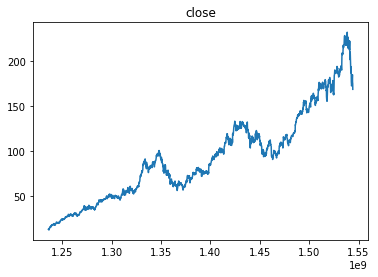

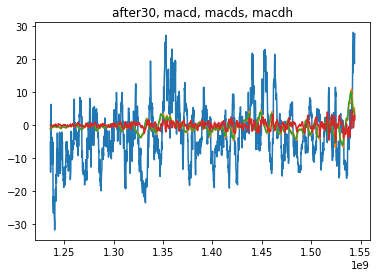

In [8]:
 macd_stat = after30_filter[['bin_after30','macd','macds','macdh']].groupby(['bin_after30']).agg(['mean'])
 print(macd_stat)

 ts1 = after30_filter[['close']]
 plt.plot(ts1)
 plt.title('close')
 plt.show()

 ts2 = after30_filter[['after30', 'macd', 'macds', 'macdh']]
 plt.plot(ts2)
 plt.title('after30, macd, macds, macdh')
 plt.show()

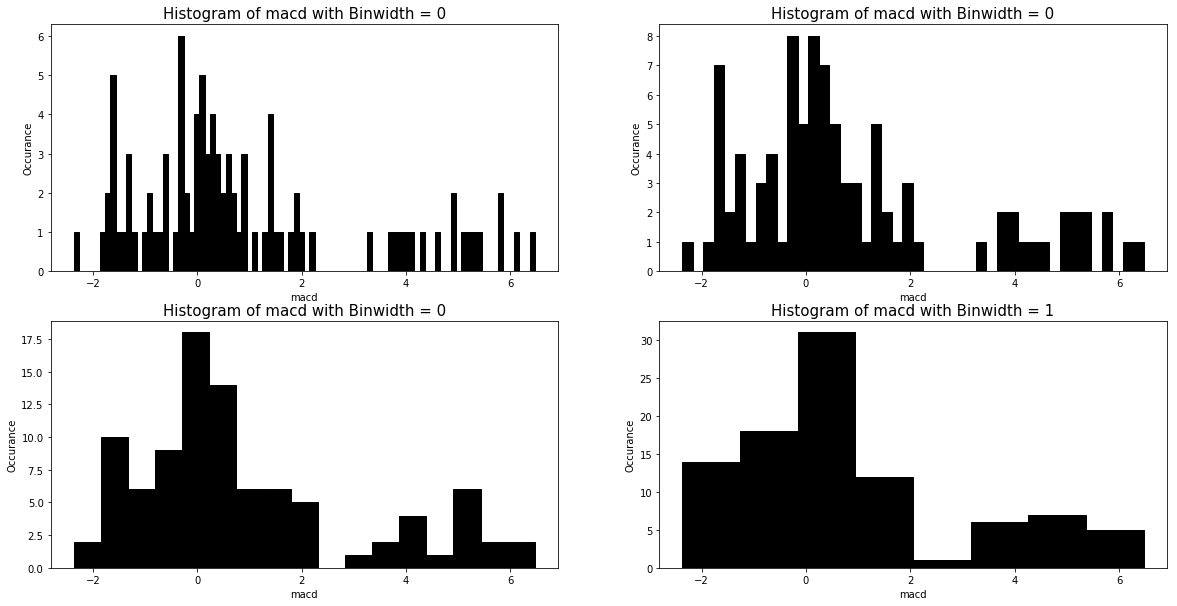

In [9]:
#analyze the macd/macds/macdh distribution when percentage increase of stock is high (15%+)
macd_filter = after30_filter.loc[dataframe['after30'] >= 15 ]
plt.figure(figsize=(20,10))
 #macd
macd_min = macd_filter['macd'].min()
macd_max = macd_filter['macd'].max()
macd_mean = macd_filter['macd'].mean()

for i, binwidth in enumerate([0.1, 0.2, 0.5, 1]):
     # Set up the plot
    macd = plt.subplot(2, 2, i + 1)

     # Draw the plot
    macd.hist(macd_filter['macd'], color='black', edgecolor='black', bins=int(abs(macd_max - macd_min)/binwidth))

     # Title and labels
    macd.set_title('Histogram of macd with Binwidth = %d' % binwidth, size=15)
    macd.set_xlabel('macd', size=10)
    macd.set_ylabel('Occurance', size=10)
    
plt.show()

In [10]:
closesma_filter1 = after30_filter.loc[dataframe['after30'] >= 15 ]

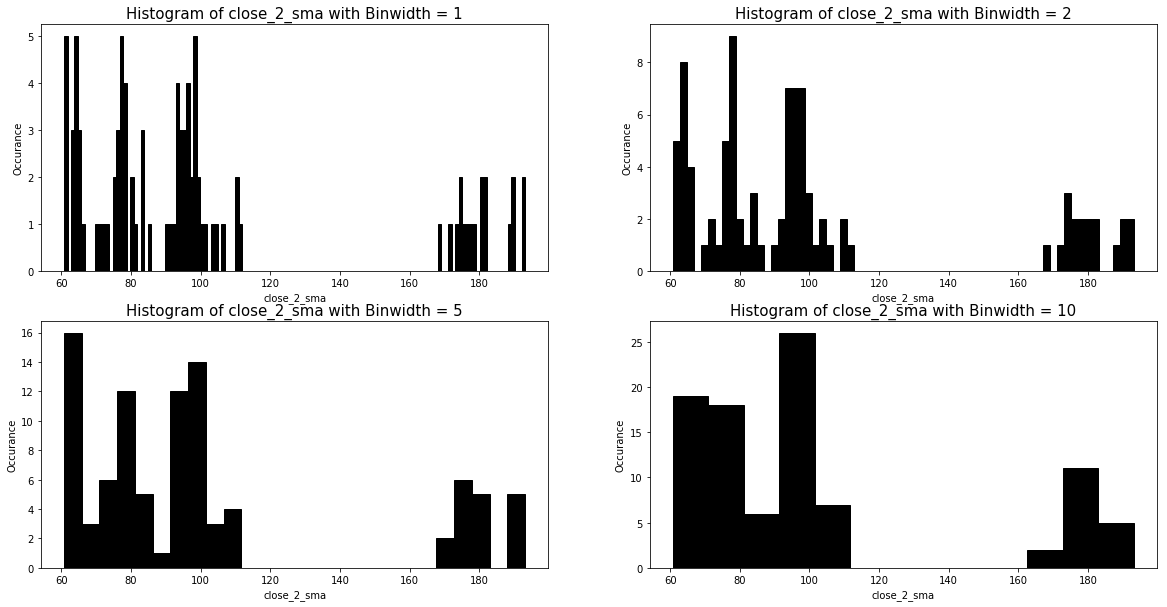

In [11]:
closesma_min = closesma_filter1['close_2_sma'].min()
closesma_max = closesma_filter1['close_2_sma'].max()
closesma_mean = closesma_filter1['close_2_sma'].mean()
plt.figure(figsize=(20,10))
for i, binwidth in enumerate([1, 2, 5, 10]):
    # Set up the plot
    closesma = plt.subplot(2, 2, i + 1)
     # Draw the plot
    closesma.hist(closesma_filter1['close_2_sma'], color='black', edgecolor='black', bins=int(abs(closesma_max - closesma_min)/binwidth))

     # Title and labels
    closesma.set_title('Histogram of close_2_sma with Binwidth = %d' % binwidth, size=15)
    closesma.set_xlabel('close_2_sma', size=10)
    closesma.set_ylabel('Occurance', size=10)

plt.show()

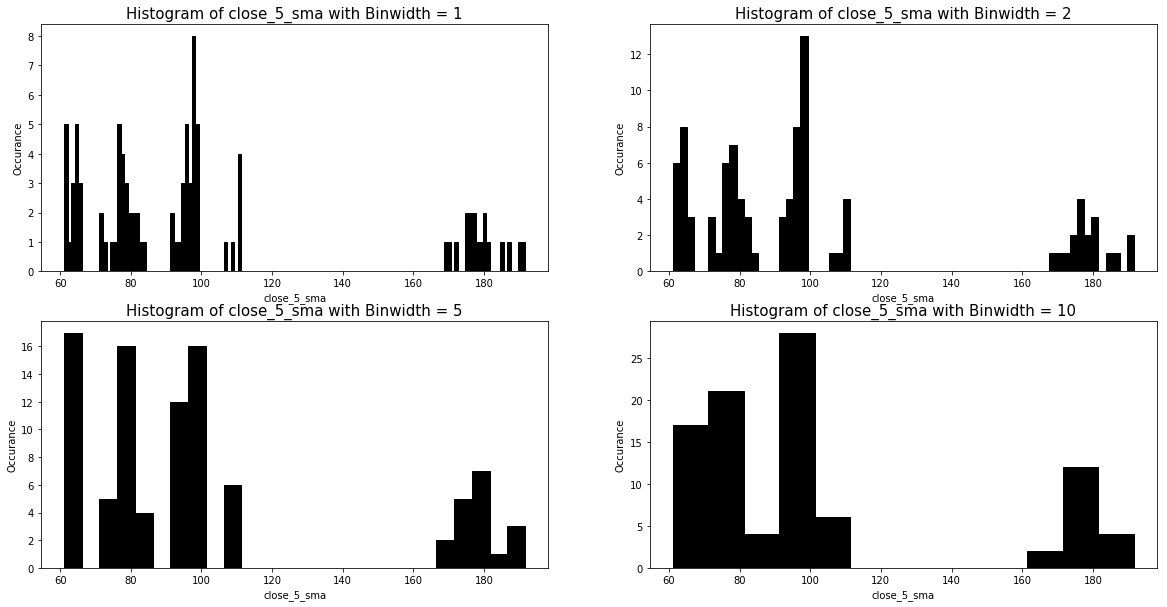

In [12]:
closesma_min = closesma_filter1['close_5_sma'].min()
closesma_max = closesma_filter1['close_5_sma'].max()
closesma_mean = closesma_filter1['close_5_sma'].mean()
plt.figure(figsize=(20,10))
for i, binwidth in enumerate([1, 2, 5, 10]):
     # Set up the plot
    closesma = plt.subplot(2, 2, i + 1)
     # Draw the plot
    closesma.hist(closesma_filter1['close_5_sma'], color='black', edgecolor='black', bins=int(abs(closesma_max - closesma_min)/binwidth))

     # Title and labels
    closesma.set_title('Histogram of close_5_sma with Binwidth = %d' % binwidth, size=15)
    closesma.set_xlabel('close_5_sma', size=10)
    closesma.set_ylabel('Occurance', size=10)

plt.show()

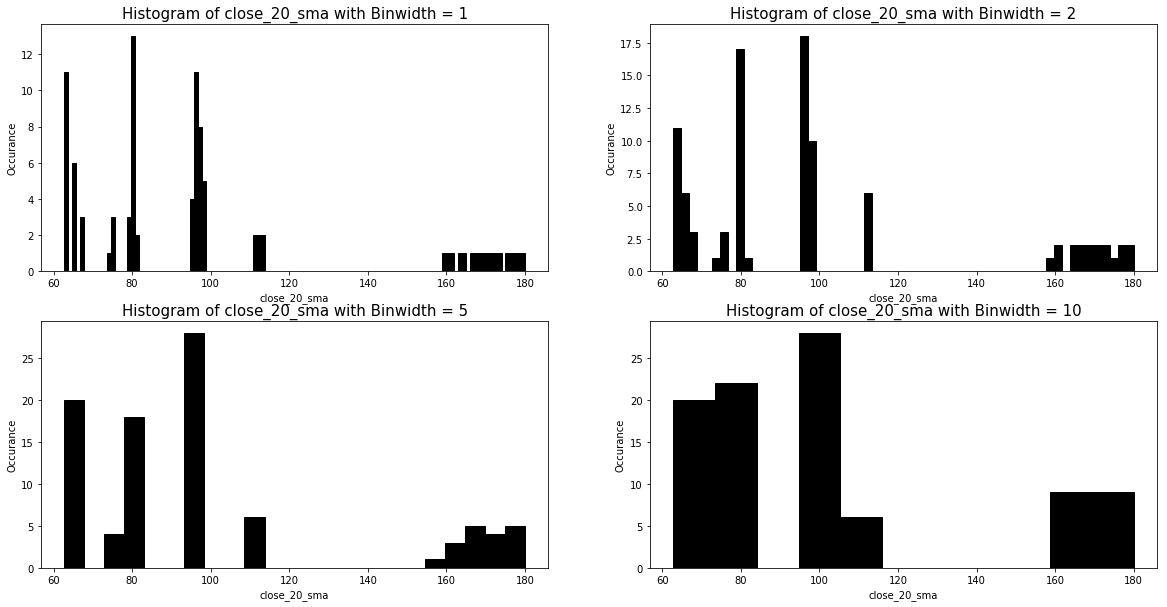

In [13]:
closesma_min = closesma_filter1['close_20_sma'].min()
closesma_max = closesma_filter1['close_20_sma'].max()
closesma_mean = closesma_filter1['close_20_sma'].mean()
plt.figure(figsize=(20,10))
for i, binwidth in enumerate([1, 2, 5, 10]):
     # Set up the plot
    closesma = plt.subplot(2, 2, i + 1)

     # Draw the plot
    closesma.hist(closesma_filter1['close_20_sma'], color='black', edgecolor='black', bins=int(abs(closesma_max - closesma_min)/binwidth))

     # Title and labels
    closesma.set_title('Histogram of close_20_sma with Binwidth = %d' % binwidth, size=15)
    closesma.set_xlabel('close_20_sma', size=10)
    closesma.set_ylabel('Occurance', size=10)

plt.show()

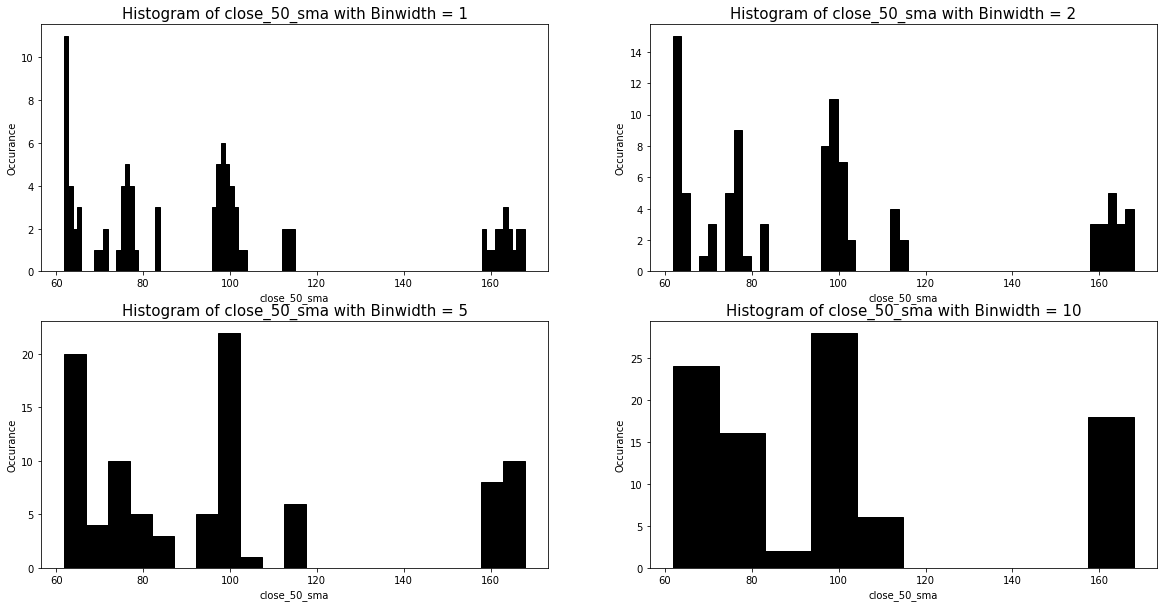

In [14]:
closesma_min = closesma_filter1['close_50_sma'].min()
closesma_max = closesma_filter1['close_50_sma'].max()
closesma_mean = closesma_filter1['close_50_sma'].mean()
plt.figure(figsize=(20,10))
for i, binwidth in enumerate([1, 2, 5, 10]):
     # Set up the plot
    closesma = plt.subplot(2, 2, i + 1)

     # Draw the plot
    closesma.hist(closesma_filter1['close_50_sma'], color='black', edgecolor='black', bins=int(abs(closesma_max - closesma_min)/binwidth))

     # Title and labels
    closesma.set_title('Histogram of close_50_sma with Binwidth = %d' % binwidth, size=15)
    closesma.set_xlabel('close_50_sma', size=10)
    closesma.set_ylabel('Occurance', size=10)

plt.show()

In [15]:
    cci_stat = after30_filter[['bin_after30','cci','cci_20']].groupby(['bin_after30']).agg(['count','mean','min','max'])
    print(cci_stat)

    ts = after30_filter[['close', 'cci','cci_20']]
    ts.plot()


cci_filter = after30_filter.loc[dataframe['after30'] >= 15 ]


cci_min = cci_filter['cci'].min()
cci_max = cci_filter['cci'].max()
cci_mean = cci_filter['cci'].mean()
plt.figure(figsize=(20,10))

for i, binwidth in enumerate([1, 5, 10, 20]):
     # Set up the plot
    cci = plt.subplot(2, 2, i + 1)

     # Draw the plot
    cci.hist(cci_filter['cci'], color='black', edgecolor='black', bins=int(abs(cci_max - cci_min)/binwidth))

     # Title and labels
    cci.set_title('Histogram of cci with Binwidth = %d' % binwidth, size=15)
    cci.set_xlabel('cci', size=10)
    cci.set_ylabel('Occurance', size=10)

plt.show()

print()
print('cci >= 0')
cci_filter1 =after30_filter.loc[dataframe['cci'] >= 0 ]
cci_group1 = cci_filter1[['bin_after30','cci','cci_20']].groupby(['bin_after30']).agg(['count','mean','min','max'])
print(cci_group1)

print()
print('cci < 0')
cci_filter1 =after30_filter.loc[dataframe['cci'] < 0 ]
cci_group1 = cci_filter1[['bin_after30','cci','cci_20']].groupby(['bin_after30']).agg(['count','mean','min','max'])
print(cci_group1)


print()
print('cci >= 50')
cci_filter2 =after30_filter.loc[dataframe['cci'] >= 50 ]
cci_group2 = cci_filter2[['bin_after30','cci','cci_20']].groupby(['bin_after30']).agg(['count','mean','min','max'])
print(cci_group2)

print()
print('cci < 50')
cci_filter2 =after30_filter.loc[dataframe['cci'] < 50 ]
cci_group2 = cci_filter2[['bin_after30','cci','cci_20']].groupby(['bin_after30']).agg(['count','mean','min','max'])
print(cci_group2)


IndentationError: expected an indented block (<ipython-input-15-728a6f0b36d6>, line 18)

                         tr                                  atr                              
                      count      mean       min        max count      mean       min       max
bin_after30                                                                                   
-1.Low Decrease         554  2.152540  0.282856  14.880005   554  2.141201  0.577758  8.446987
-2.Moderate Decrease    564  1.943909  0.228573  10.080002   564  2.033037  0.511820  7.937711
-3.High Decrease        316  1.783268  0.217142   8.029999   316  2.011013  0.513622  6.327100
-4.Very High Decrease   134  1.728177  0.180000   7.980003   134  1.945871  0.516204  6.186773
-5.Extreme Decrease      35  1.347102  0.309999   4.832855    35  1.442808  0.554963  2.778047
0.Neutral                 1  3.260002  3.260002   3.260002     1  3.229982  3.229982  3.229982
1.Low Increase          468  2.327485  0.309999  13.600006   468  2.419026  0.657182  8.722299
2.Moderate Increase     210  2.586843  0.392857  1

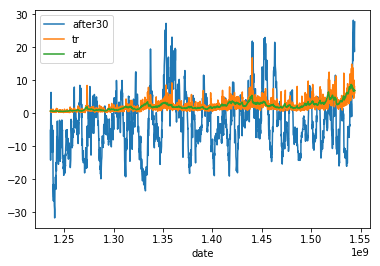

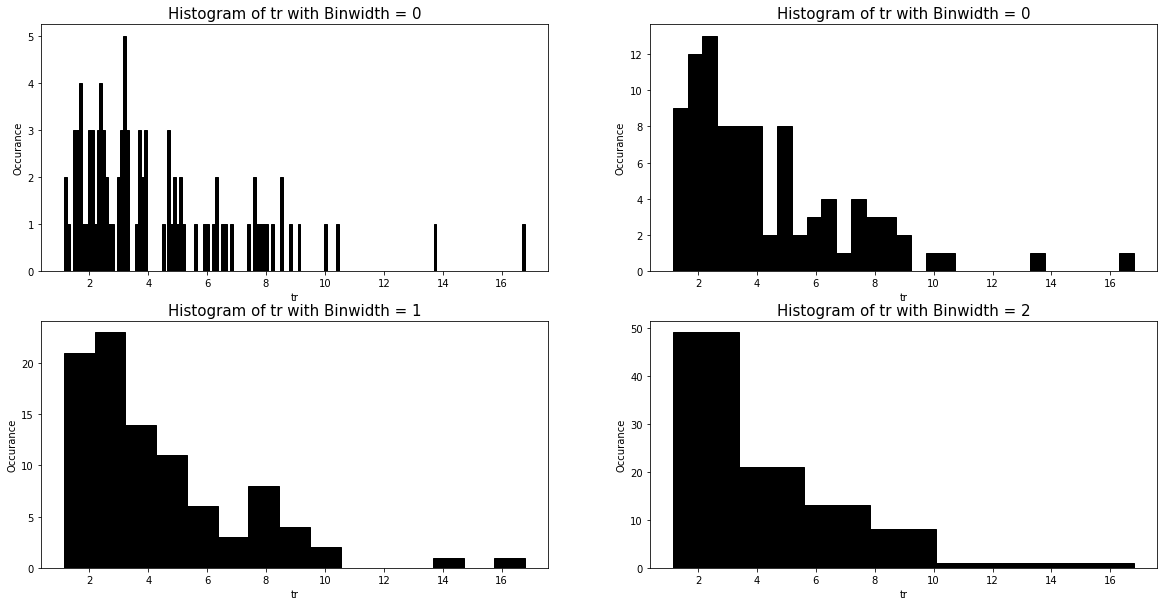

                         tr                                  atr                              
                      count      mean       min        max count      mean       min       max
bin_after30                                                                                   
-1.Low Decrease         123  4.634820  2.889999  14.880005   123  3.539822  1.262529  8.446987
-2.Moderate Decrease    102  4.374062  2.880005  10.080002   102  3.294395  1.668181  7.937711
-3.High Decrease         51  4.386918  2.919998   8.029999    51  3.777768  1.563526  6.327100
-4.Very High Decrease    17  4.341766  2.955719   7.980003    17  3.041690  1.848189  6.186773
-5.Extreme Decrease       4  3.566784  3.065712   4.832855     4  2.653521  2.574099  2.778047
0.Neutral                 1  3.260002  3.260002   3.260002     1  3.229982  3.229982  3.229982
1.Low Increase          121  4.685336  2.899994  13.600006   121  3.865543  1.745490  8.722299
2.Moderate Increase      62  4.830045  2.889999  1

In [16]:
#tr


tr_stat = after30_filter[['bin_after30','tr','atr']].groupby(['bin_after30']).agg(['count','mean','min','max'])
print(tr_stat)

ts = after30_filter[['after30','tr','atr']]
ts.plot()
#
#
#
tr_filter = after30_filter.loc[dataframe['after30'] >= 15 ]

#
tr_min = tr_filter['tr'].min()
tr_max = tr_filter['tr'].max()
tr_mean = tr_filter['tr'].mean()

plt.figure(figsize=(20,10))

for i, binwidth in enumerate([0.1, 0.5, 1, 2]):
     # Set up the plot
    tr = plt.subplot(2, 2, i + 1)
     # Draw the plot
    tr.hist(tr_filter['tr'], color='black', edgecolor='black', bins=int(abs(tr_max - tr_min)/binwidth))
    # Title and labels
    tr.set_title('Histogram of tr with Binwidth = %d' % binwidth, size=15)
    tr.set_xlabel('tr', size=10)
    tr.set_ylabel('Occurance', size=10)


plt.show()

tr_filter = after30_filter.loc[dataframe['tr'] >= 2.88 ]
tr_min = tr_filter['tr'].min()
tr_max = tr_filter['tr'].max()
tr_mean = tr_filter['tr'].mean()

tr_stat = tr_filter[['bin_after30','tr','atr']].groupby(['bin_after30']).agg(['count','mean','min','max'])
print(tr_stat)


tr_filter = after30_filter.loc[dataframe['tr'] < 2.88 ]

tr_min = tr_filter['tr'].min()
tr_max = tr_filter['tr'].max()
tr_mean = tr_filter['tr'].mean()

tr_stat = tr_filter[['bin_after30','tr','atr']].groupby(['bin_after30']).agg(['count','mean','min','max'])
print(tr_stat)

    

                        dma                                
                      count      mean        min        max
bin_after30                                                
-1.Low Decrease         554 -1.252035 -18.609200  33.345199
-2.Moderate Decrease    564 -1.014580 -13.058200  22.548599
-3.High Decrease        316 -0.931494 -11.584515  10.082801
-4.Very High Decrease   134 -0.956055 -11.296972   7.911315
-5.Extreme Decrease      35 -1.278033  -8.616315   3.522744
0.Neutral                 1 -8.479599  -8.479599  -8.479599
1.Low Increase          468 -2.009497 -20.030201  33.525601
2.Moderate Increase     210 -1.896995 -16.653198  26.602739
3.High Increase          86 -0.126544 -13.652998  18.643427
4.Very High Increase     58  1.121868  -7.929200  16.528218
5. Extreme Increase      36  4.663266  -5.608601  14.701666


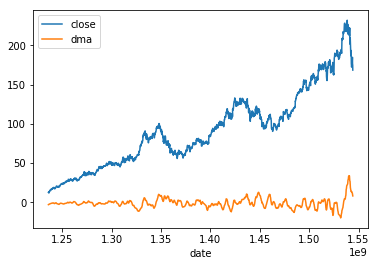

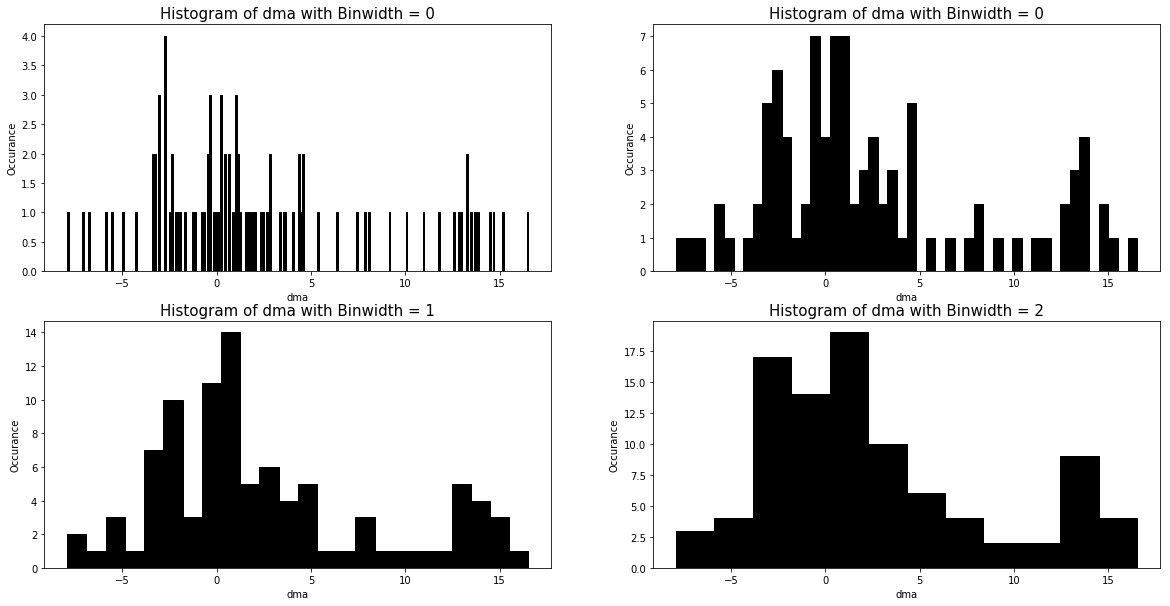


dma >= 0
                        dma                               
                      count      mean       min        max
bin_after30                                               
-1.Low Decrease         192  3.901154  0.038114  33.345199
-2.Moderate Decrease    195  3.665502  0.001000  22.548599
-3.High Decrease         90  4.270650  0.058715  10.082801
-4.Very High Decrease    46  2.571148  0.007743   7.911315
-5.Extreme Decrease       8  2.166504  0.588343   3.522744
1.Low Increase          129  6.656379  0.006686  33.525601
2.Moderate Increase      61  5.668124  0.174771  26.602739
3.High Increase          41  4.437709  0.404628  18.643427
4.Very High Increase     32  4.272162  0.146857  16.528218
5. Extreme Increase      25  7.725808  1.001600  14.701666

dma < 0
                        dma                               
                      count      mean        min       max
bin_after30                                               
-1.Low Decrease         362 -3.985217

In [17]:
dma_stat = after30_filter[['bin_after30','dma']].groupby(['bin_after30']).agg(['count','mean','min','max'])
print(dma_stat)

ts = after30_filter[['close','dma']]
ts.plot()


dma_filter = after30_filter.loc[dataframe['after30'] >= 15 ]

dma_min = dma_filter['dma'].min()
dma_max = dma_filter['dma'].max()
dma_mean = dma_filter['dma'].mean()

plt.figure(figsize=(20,10))

for i, binwidth in enumerate([0.1, 0.5, 1, 2]):
     # Set up the plot
    dma = plt.subplot(2, 2, i + 1)

    # Draw the plot
    dma.hist(dma_filter['dma'], color='black', edgecolor='black', bins=int(abs(dma_max - dma_min)/binwidth))

     # Title and labels
    dma.set_title('Histogram of dma with Binwidth = %d' % binwidth, size=15)
    dma.set_xlabel('dma', size=10)
    dma.set_ylabel('Occurance', size=10)

plt.show()


dma_filter = after30_filter.loc[dataframe['dma'] >= 0 ]

print()
print('dma >= 0')
dma_stat = dma_filter[['bin_after30','dma']].groupby(['bin_after30']).agg(['count','mean','min','max'])
print(dma_stat)

dma_filter = after30_filter.loc[dataframe['dma'] < 0 ]

print()
print('dma < 0')
dma_stat = dma_filter[['bin_after30','dma']].groupby(['bin_after30']).agg(['count','mean','min','max'])
print(dma_stat)


                         vr                                    vr_6_sma                                   
                      count        mean        min         max    count        mean        min         max
bin_after30                                                                                               
-1.Low Decrease         554   94.990694  21.458041  238.172982      554   95.211394  26.853907  203.491454
-2.Moderate Decrease    564  101.905477  28.587443  255.131461      564  100.162626  34.027404  239.493926
-3.High Decrease        316   98.914735  25.126388  300.014442      316   99.148474  31.546265  248.439638
-4.Very High Decrease   134  105.577045  26.401015  310.613649      134  106.625983  29.525259  275.235175
-5.Extreme Decrease      35   89.945397  39.199588  215.083085       35   98.758445  46.745576  220.534235
0.Neutral                 1   36.872485  36.872485   36.872485        1   40.001289  40.001289   40.001289
1.Low Increase          468   88.4779

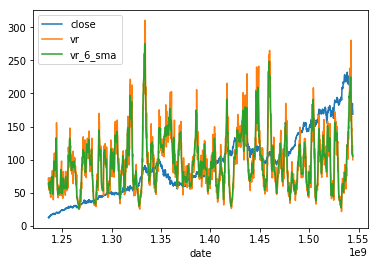

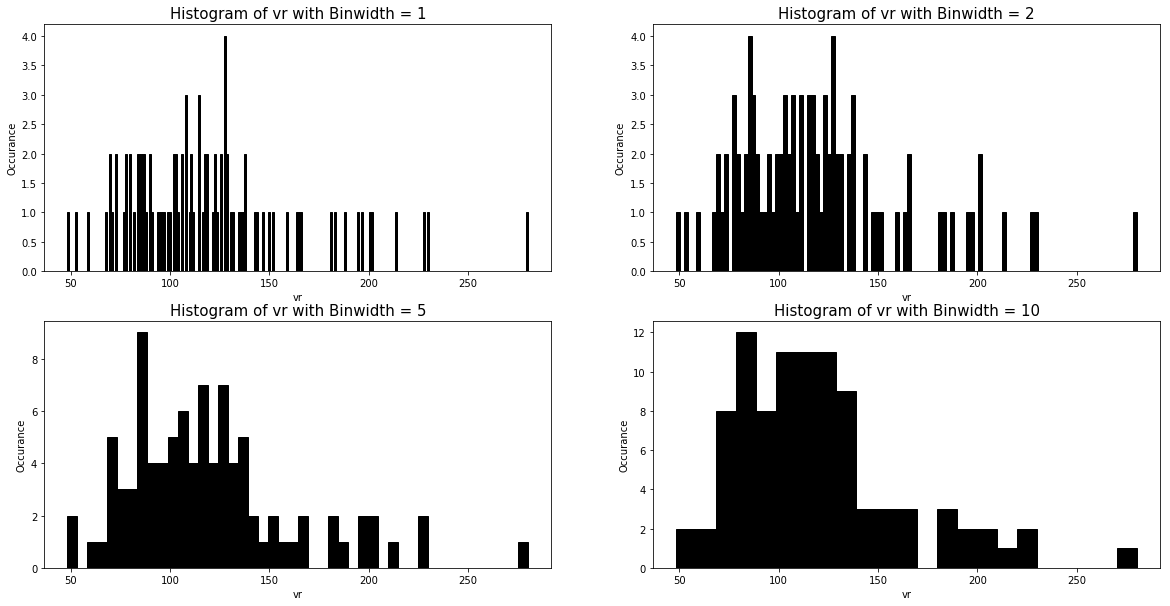

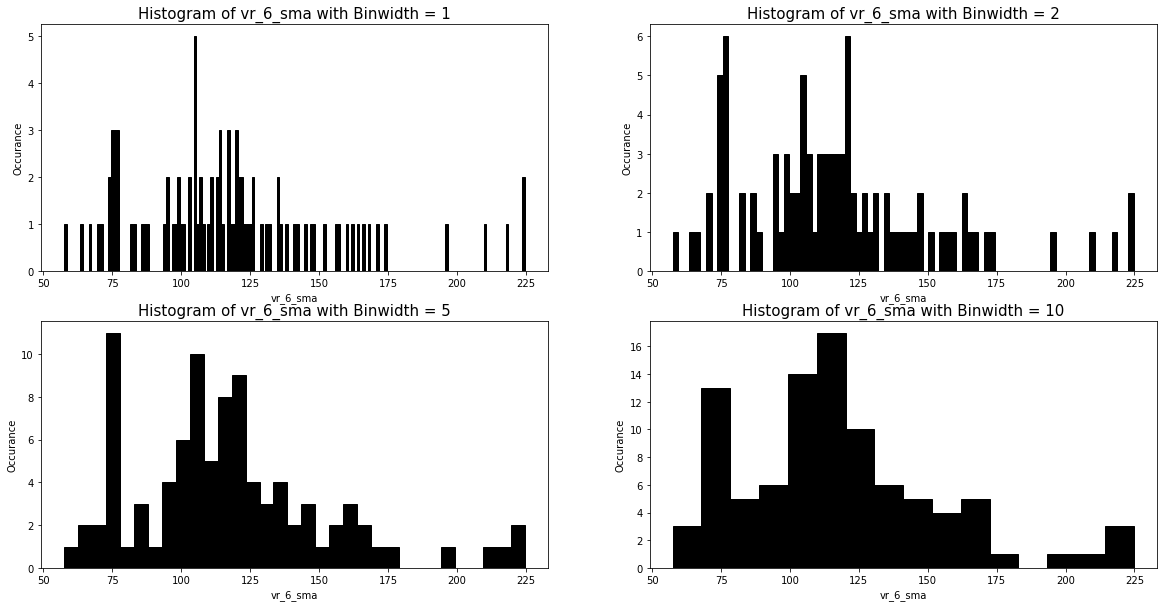


vr <= 21
Empty DataFrame
Columns: [(vr, count), (vr, mean), (vr, min), (vr, max), (vr_6_sma, count), (vr_6_sma, mean), (vr_6_sma, min), (vr_6_sma, max)]
Index: []

vr <= 50
                         vr                                  vr_6_sma                                 
                      count       mean        min        max    count       mean        min        max
bin_after30                                                                                           
-1.Low Decrease          56  40.511465  21.458041  49.866683       56  47.362734  26.853907  97.816249
-2.Moderate Decrease     29  43.703985  28.587443  49.893212       29  49.985847  34.027404  67.150312
-3.High Decrease         25  42.705438  25.126388  49.963948       25  49.440723  31.546265  68.060121
-4.Very High Decrease    16  40.144279  26.401015  49.687683       16  46.312443  29.525259  78.292434
-5.Extreme Decrease       5  44.484650  39.199588  48.134255        5  55.169695  46.745576  68.931938
0.

In [18]:
#vr


vr_stat = after30_filter[['bin_after30','vr','vr_6_sma']].groupby(['bin_after30']).agg(['count','mean','min','max'])
print(vr_stat)

ts = after30_filter[['close','vr','vr_6_sma']]
ts.plot()


vr_filter = after30_filter.loc[dataframe['after30'] >= 15 ]

vr_min = vr_filter['vr'].min()
vr_max = vr_filter['vr'].max()
vr_mean = vr_filter['vr'].mean()

plt.figure(figsize=(20,10))

for i, binwidth in enumerate([1, 2, 5, 10]):
     # Set up the plot
    vr = plt.subplot(2, 2, i + 1)

     # Draw the plot
    vr.hist(vr_filter['vr'], color='black', edgecolor='black', bins=int(abs(vr_max - vr_min)/binwidth))

     # Title and labels
    vr.set_title('Histogram of vr with Binwidth = %d' % binwidth, size=15)
    vr.set_xlabel('vr', size=10)
    vr.set_ylabel('Occurance', size=10)

plt.show()  

vr_min = vr_filter['vr_6_sma'].min()
vr_max = vr_filter['vr_6_sma'].max()
vr_mean = vr_filter['vr_6_sma'].mean()

plt.figure(figsize=(20,10))

for i, binwidth in enumerate([1, 2, 5, 10]):
     # Set up the plot
    vr = plt.subplot(2, 2, i + 1)

     # Draw the plot
    vr.hist(vr_filter['vr_6_sma'], color='black', edgecolor='black', bins=int(abs(vr_max - vr_min)/binwidth))

     # Title and labels
    vr.set_title('Histogram of vr_6_sma with Binwidth = %d' % binwidth, size=15)
    vr.set_xlabel('vr_6_sma', size=10)
    vr.set_ylabel('Occurance', size=10)

plt.show()

vr_filter = after30_filter.loc[dataframe['vr'] <= 21 ]

vr_min = vr_filter['vr'].min()
vr_max = vr_filter['vr'].max()
vr_mean = vr_filter['vr'].mean()

print()
print('vr <= 21')
vr_stat = vr_filter[['bin_after30','vr','vr_6_sma']].groupby(['bin_after30']).agg(['count','mean','min','max'])
print(vr_stat)


vr_filter = after30_filter.loc[dataframe['vr'] <= 50 ]

vr_min = vr_filter['vr'].min()
vr_max = vr_filter['vr'].max()
vr_mean = vr_filter['vr'].mean()

print()
print('vr <= 50')
vr_stat = vr_filter[['bin_after30','vr','vr_6_sma']].groupby(['bin_after30']).agg(['count','mean','min','max'])
print(vr_stat)

vr_filter = after30_filter.loc[dataframe['vr'] > 50 ]

vr_min = vr_filter['vr'].min()
vr_max = vr_filter['vr'].max()
vr_mean = vr_filter['vr'].mean()

print()
print('vr > 50')
vr_stat = vr_filter[['bin_after30','vr','vr_6_sma']].groupby(['bin_after30']).agg(['count','mean','min','max'])
print(vr_stat)

#if vr is lower than 50, it is very likely to have increase over month


#
vr_filter = after30_filter.loc[dataframe['vr'] <= 100 ]
#
vr_min = vr_filter['vr'].min()
vr_max = vr_filter['vr'].max()
vr_mean = vr_filter['vr'].mean()
#
print()
print('vr <= 100')
vr_stat = vr_filter[['bin_after30','vr','vr_6_sma']].groupby(['bin_after30']).agg(['count','mean','min','max'])
print(vr_stat)
#
#
vr_filter = after30_filter.loc[dataframe['vr'] > 100 ]
#
vr_min = vr_filter['vr'].min()
vr_max = vr_filter['vr'].max()
vr_mean = vr_filter['vr'].mean()
#
print()
print('vr > 100')
vr_stat = vr_filter[['bin_after30','vr','vr_6_sma']].groupby(['bin_after30']).agg(['count','mean','min','max'])
print(vr_stat)



vr_filter = after30_filter.loc[dataframe['vr_6_sma'] <= 50 ]

vr_min = vr_filter['vr_6_sma'].min()
vr_max = vr_filter['vr_6_sma'].max()
vr_mean = vr_filter['vr_6_sma'].mean()

print()
print('vr <= 50')
vr_stat = vr_filter[['bin_after30','vr','vr_6_sma']].groupby(['bin_after30']).agg(['count','mean','min','max'])
print(vr_stat)


vr_filter = after30_filter.loc[dataframe['vr_6_sma'] > 50 ]

vr_min = vr_filter['vr_6_sma'].min()
vr_max = vr_filter['vr_6_sma'].max()
vr_mean = vr_filter['vr_6_sma'].mean()

print()
print('vr > 50')
vr_stat = vr_filter[['bin_after30','vr','vr_6_sma']].groupby(['bin_after30']).agg(['count','mean','min','max'])
print(vr_stat)



vr_filter = after30_filter.loc[dataframe['vr_6_sma'] <= 26.5 ]

vr_min = vr_filter['vr_6_sma'].min()
vr_max = vr_filter['vr_6_sma'].max()
vr_mean = vr_filter['vr_6_sma'].mean()

print()
print('vr <= 26.5')
vr_stat = vr_filter[['bin_after30','vr','vr_6_sma']].groupby(['bin_after30']).agg(['count','mean','min','max'])
print(vr_stat)


vr_filter = after30_filter.loc[dataframe['vr_6_sma'] > 26.5 ]

vr_min = vr_filter['vr_6_sma'].min()
vr_max = vr_filter['vr_6_sma'].max()
vr_mean = vr_filter['vr_6_sma'].mean()

print()
print('vr > 26.5')
vr_stat = vr_filter[['bin_after30','vr','vr_6_sma']].groupby(['bin_after30']).agg(['count','mean','min','max'])
print(vr_stat)


In [19]:
import pandas as pd
import numpy as np
from datetime import datetime, timedelta
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_regression
from StockPriceForModel import StockPriceForModel


## Getting stock data from StockPriceForModel
We can choose any ticker and the time period (e.g. 2,3,5 or 10 years) to train and predict data. The code will grasp data from today to the time period you choose.

In this code, we choose APPLE stock with time period = 10 years.

Each record in the price_features will contains the original stock trading data and the price label (label_price) which is the close price of the next day as the class to predict.

We also add numbers of technical indicators which captures all historical data and the historical stock movement's important information.

Here is the list of technical indicators we have added into our stock dataset:

middle = (close + high + low) / 3
SMA: simple moving average
EMA: exponential moving average
MSTD: moving standard deviation
MVAR: moving variance
RSV: raw stochastic value
RSI: relative strength index
KDJ: Stochastic oscillator
Bolling: including upper band and lower band.
MACD: moving average convergence divergence. Including signal and histogram. (see note)
CR:
WR: Williams Overbought/Oversold index
CCI: Commodity Channel Index
TR: true range
ATR: average true range
line cross check, cross up or cross down.
DMA: Different of Moving Average (10, 50)
DMI: Directional Moving Index, including
+DI: Positive Directional Indicator
-DI: Negative Directional Indicator
ADX: Average Directional Movement Index
ADXR: Smoothed Moving Average of ADX
TRIX: Triple Exponential Moving Average
VR: Volatility Volume Ratio

In [20]:
ticker = 'AAPL'
to_date = datetime.strftime(datetime.today() - timedelta(days=1), '%Y-%m-%d')
from_date = datetime.strftime(datetime.today() - timedelta(days=10*365), '%Y-%m-%d')
appl = StockPriceForModel(ticker, from_date, to_date, 2, 15)
dataframe = appl.price_features
dataframe = dataframe.dropna()



twitter_data = pd.read_csv("tweets2s.csv",names=["Tweet#","Date","Tweet","Sentiment Analysis"])

#print(twitter_data.head())

dates = pd.DataFrame(twitter_data['Date'])
visits = pd.DataFrame(twitter_data['Sentiment Analysis'].str.split(expand=True))

dates['Date'] = pd.to_datetime(dates['Date'], format='%a %b %d %H:%M:%S +0000 %Y', utc=True)
dates['Date'] = dates['Date'].dt.date


visits.columns=['Polarity','Subjectivity']

cols_to_check=['Polarity']
cols_to_check2=['Subjectivity']

for col in cols_to_check:
    visits[col] = visits[col].apply(lambda x : x[1:])
    visits[col] = visits[col].apply(lambda x: x[:-1])

for col in cols_to_check2:
    visits[col] = visits[col].apply(lambda x : x[:-1])


visits['Polarity']=pd.to_numeric(visits['Polarity'])
visits['Subjectivity']=pd.to_numeric(visits['Subjectivity'])

dated_visits = pd.concat([dates, visits], join='outer', axis=1)

date_groups = dated_visits.groupby("Date")

mean_polarity = date_groups['Polarity'].mean()
mean_subjectivity = date_groups['Subjectivity'].mean()

mean_polarity = mean_polarity.to_frame().reset_index()
mean_subjectivity = mean_subjectivity.to_frame().reset_index()

mean_polarity.rename(columns={ mean_polarity.columns[1]: "Polarity" })
mean_subjectivity.rename(columns={ mean_subjectivity.columns[1]: "Subjectivity" })

subj = mean_subjectivity.loc[:, mean_subjectivity.columns != 'Date']

sentiments = pd.concat([mean_polarity, subj ], join='outer', axis=1)

sentiments['Subjectivity'] = sentiments['Subjectivity']+1
sentiments['Overall'] = sentiments['Polarity']/sentiments['Subjectivity']

sentiments.sort_values(by='Date', ascending=False, inplace=True)
dataframe.sort_values(by='formatted_date', ascending=False, inplace=True)

sentiments['Date'] = sentiments['Date'].apply(lambda x : x.strftime('%Y-%m-%d'))

dataframe['sentiment'] = 0.0

for index, row in dataframe.iterrows():
    for index2, row2 in sentiments.iterrows():
        if row[8] == row2[0]:
            dataframe.loc[index, 99] = row2[3]


print(list(dataframe.columns.values))


/home/silviu/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:58: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/home/silviu/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:62: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


['adj_close', 'close', 'formatted_date', 'high', 'label_price', 'low', 'open', 'volume', 'volume_delta', 'open_-2_r', 'middle', 'cr', 'cr-ma1', 'cr-ma2', 'cr-ma3', 'cr-ma1_20_c', 'cr-ma2_xu_cr-ma1_20_c', 'volume_-3_s', 'volume_-1_s', 'volume_2_s', 'volume_-3,2,-1_max', 'volume_-2_s', 'volume_0_s', 'volume_1_s', 'volume_-3~1_min', 'rsv_9', 'kdjk_9', 'kdjk', 'kdjd_9', 'kdjd', 'kdjj_9', 'kdjj', 'close_2_sma', 'close_5_sma', 'close_20_sma', 'close_50_sma', 'close_200_sma', 'close_-1_s', 'close_-1_d', 'rs_6', 'rsi_6', 'rs_12', 'rsi_12', 'wr_10', 'wr_6', 'middle_14_sma', 'cci', 'middle_20_sma', 'cci_20', 'tr', 'atr', 'close_10_sma', 'dma', 'high_delta', 'um', 'low_delta', 'dm', 'pdm', 'pdm_14_ema', 'pdm_14', 'atr_14', 'pdi_14', 'pdi', 'mdm', 'mdm_14_ema', 'mdm_14', 'mdi_14', 'mdi', 'dx_14', 'dx', 'dx_6_ema', 'adx', 'adx_6_ema', 'adxr', 'trix', 'trix_9_sma', 'change', 'vr', 'vr_6_sma', 'close_12_ema', 'close_26_ema', 'macd', 'macds', 'macdh', 'close_20_mstd', 'boll', 'boll_ub', 'boll_lb', 'se

## Plot the stock's close price
In this block, we plot the close price of the stock comparing with the simple movement average of 50, 200 days.
You can the trend for short term and long term price movement. 

/home/silviu/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


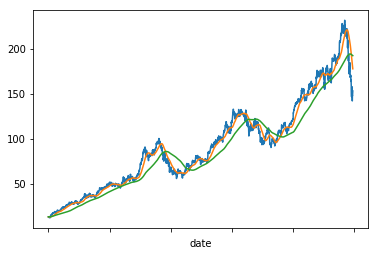

In [22]:
dataframe.sort_values(by='formatted_date', ascending=True, inplace=True)

#print(dataframe.columns.get_values())
sp_close_series = dataframe.close
sp_close_series.plot()
sp_sma_series_50 = dataframe.close_50_sma  
sp_sma_series_50.plot()
sp_sma_series_200 = dataframe.close_200_sma  
sp_sma_series_200.plot()

## Model
We use a simple linear regression as the first model for our prediction.
We also use pipline to do some feature tasks:
+ Impute missing values using the mean
+ Transform features to quadratic
+ Fit a linear regression
The returned performances are quit good with R^2 in range of [0.5,1]

In [23]:
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.impute import SimpleImputer 
from sklearn import model_selection

model = make_pipeline(SimpleImputer(strategy='mean'),
                      PolynomialFeatures(degree=2),
                      LinearRegression())


dataframe.drop('formatted_date', axis=1, inplace=True)

#print(list(dataframe.columns.values))

#print('Before X')

X = dataframe.loc[:, dataframe.columns != 'label_price']
y = dataframe.loc[:,'label_price']

#print('After X')

seed = 7
kfold = model_selection.KFold(n_splits=10, random_state=seed)
scoring = 'neg_mean_absolute_error'
results = model_selection.cross_val_score(model, X, y, cv=kfold, scoring=scoring)
print("MAE: ", results.mean(), results.std())
scoring = 'r2'
results = model_selection.cross_val_score(model, X, y, cv=kfold, scoring=scoring)
print("R^2:", results.mean(), results.std())

/home/silviu/.local/lib/python3.6/site-packages/pandas/core/frame.py:3697: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  errors=errors)


MAE:  -2.1045332873950824 0.7125926650343508
R^2: 0.8265191942342074 0.1587653334623415


## Ensemble Method ##

We are going to try different models and check what kind of results we are going to get. 

__PloynomialRegression__ is a simple technique and quite easy to interpret. A possible issue with __PolynomialRegression__  is that, in our case, overfitting becomes a very distinct possibility.

__kNN__ is another model that would probably work for us. __kNN__ finds similarities between new data and old data based on independent variables.

First let's check how second degree __PolynomialRegression__ model perfoms. We are going to plot real data and predictions for last bunch of points.

Let's check how many rows we have in total in our dataframe.

In [24]:
len(dataframe.index)

2490

We are going to use 90% of data as train set and last 10% as test set.

In [25]:

X_train = X[:2241]
y_train = y[:2241]

X_valid = X[2241:]
y_valid = y[2241:]

#check if dwe have any NA's in the data - in theory we should not observe any NA's
print('Do we have any NA values for train data? ', X_train.isnull().values.any(), y_train.isnull().values.any())
print('Do we have any NA values for test data? ', X_valid.isnull().values.any(), y_valid.isnull().values.any())


print(X_valid.head())

print(y_valid.head())

Do we have any NA values for train data?  False False
Do we have any NA values for test data?  False False
             adj_close       close        high         low        open    volume  volume_delta  open_-2_r      middle          cr    ...      close_12_ema  close_26_ema      macd     macds     macdh  close_20_mstd        boll     boll_ub     boll_lb  sentiment
date                                                                                                                                 ...                                                                                                                            
2018-01-12  174.470642  177.089996  177.360001  175.649994  176.179993  25226000     6558300.0   1.744045  176.699997  152.044695    ...        174.139228    173.023034  1.116194  0.834150  0.564089       2.071238  173.542999  177.685475  169.400523        0.0
2018-01-16  173.583969  176.190002  179.389999  176.139999  177.899994  29565900     4339900.0   1.895869  177

In [26]:
import numpy as np

lin_regressor = LinearRegression()

# pass the order of your polynomial here  
poly = PolynomialFeatures(2)

# convert to be used further to linear regression
X_transform = poly.fit_transform(X_train)

# fit this to Linear Regressor
lin_regressor.fit(X_transform,y_train) 

X_transform_valid = poly.fit_transform(X_valid)

y_preds = lin_regressor.predict(X_transform_valid)
y_preds = y_preds[:-1]
y_valid = y_valid[:-1]
#make predictions and find the rmse
#preds = model.predict(x_valid)
rms=np.sqrt(np.mean(np.power((np.array(y_valid)-np.array(y_preds)),2)))
rms
#print(y_preds)

4.19357837773794

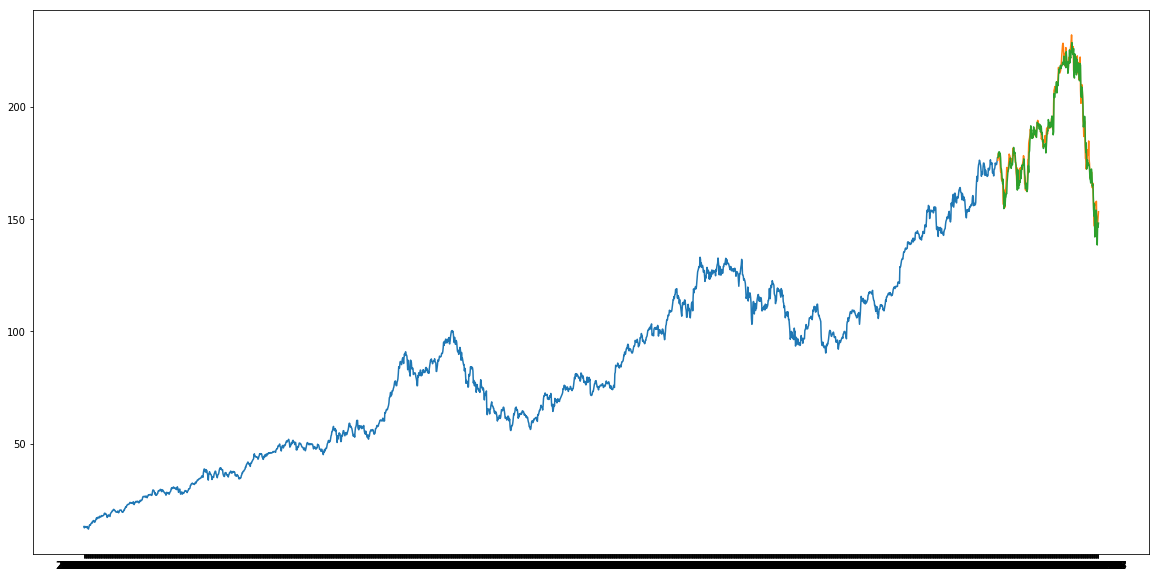

In [27]:
#plot
import matplotlib.pyplot as plt
%matplotlib inline

#setting figure size
from matplotlib.pylab import rcParams
rcParams['figure.figsize'] = 20,10

train = dataframe[:2241]
valid = dataframe[2241:]
valid = valid[:-1]

valid['Predictions'] = 0
valid['Predictions'] = y_preds

valid.index = dataframe[2241:2489].index
train.index = dataframe[:2241].index

plt.plot(train['label_price'])
plt.plot(valid[['label_price', 'Predictions']])

Interesting plot. Did we run into overfitting? Let's try __kNN__ and check it's results.

## kNN ##

In [28]:
#importing libraries
from sklearn import neighbors
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import MinMaxScaler
import pandas as pd

scaler = MinMaxScaler(feature_range=(0, 1))


X_train = X[:2241]
y_train = y[:2241]

X_valid = X[2241:]
y_valid = y[2241:]

#scaling data
#x_train_scaled = scaler.fit_transform(X_train)
#x_train_df = pd.DataFrame(x_train_scaled)
#x_valid_scaled = scaler.fit_transform(X_valid)
#x_valid_df = pd.DataFrame(x_valid_scaled)

#using gridsearch to find the best parameter
params = {'n_neighbors':[2,3,4,5,6,7,8,9]}
knn = neighbors.KNeighborsRegressor()
model = GridSearchCV(knn, params, cv=5)

#fit the model and make predictions
model.fit(X_train,y_train)
preds = model.predict(X_valid)

/home/silviu/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


### Results ###

In [29]:
#rmse
rms=np.sqrt(np.mean(np.power((np.array(y_valid)-np.array(preds)),2)))
rms

69.79837893759746

We notice above that the RMSE is really big for kNN compared with a linear regression. Try to plot the data and look at results.

/home/silviu/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """
/home/silviu/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


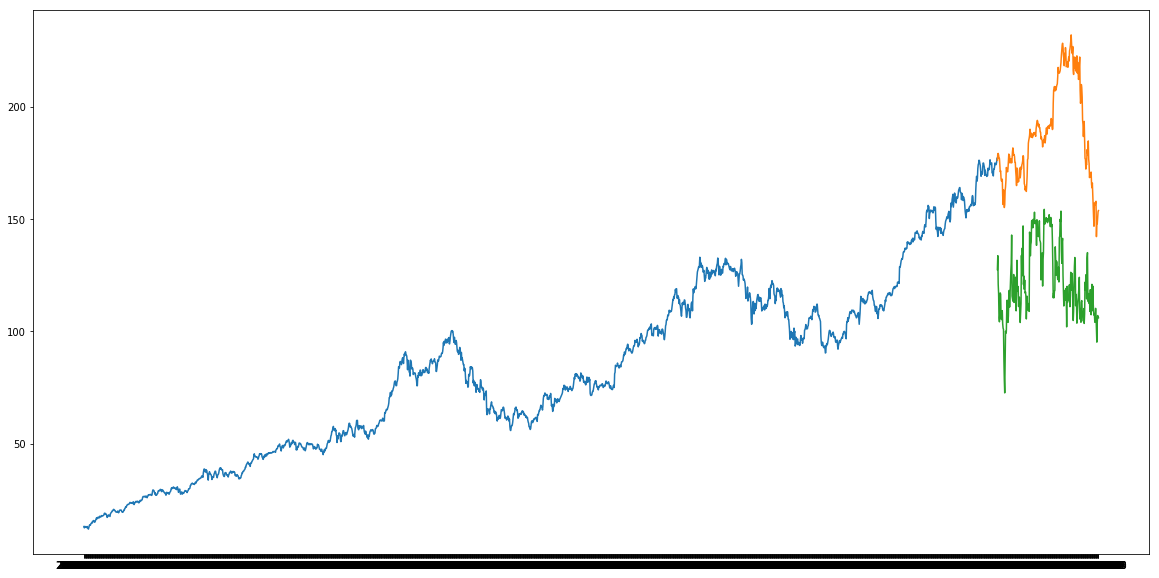

In [30]:
#plot
train = dataframe[:2241]
valid = dataframe[2241:]

valid['Predictions'] = 0
valid['Predictions'] = preds

plt.plot(train['label_price'])
plt.plot(valid[['label_price', 'Predictions']])

As we can see above __kNN__ follows the price trend but it has __high bias__.

/home/silviu/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/home/silviu/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:23: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


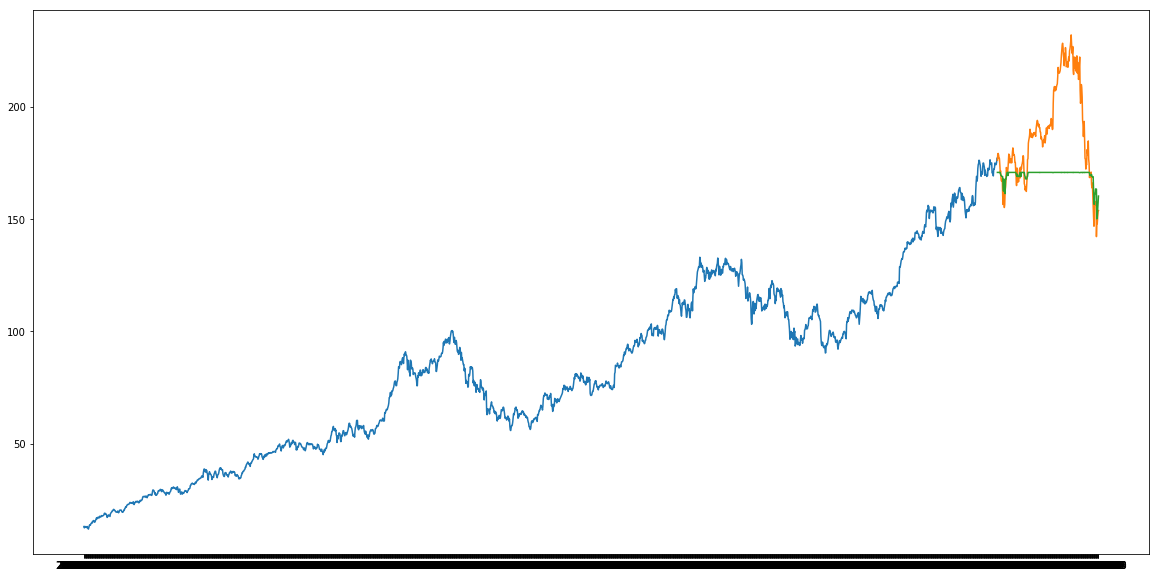

In [31]:
# Using Gradient Boosting Regressor
import numpy as np
from sklearn.metrics import mean_squared_error
from sklearn.datasets import make_friedman1
from sklearn.ensemble import GradientBoostingRegressor

X_train = X[:2241]
y_train = y[:2241]

X_valid = X[2241:]
y_valid = y[2241:]

est = GradientBoostingRegressor(n_estimators=100, learning_rate=0.1,
                                 max_depth=1, random_state=0, loss='ls').fit(X_train, y_train)

preds = est.predict(X_valid)
mean_squared_error(y_valid, est.predict(X_valid))    

train = dataframe[:2241]
valid = dataframe[2241:]

valid['Predictions'] = 0
valid['Predictions'] = preds
valid.index = dataframe[2241:].index
train.index = dataframe[:2241].index
plt.plot(train['label_price'])
plt.plot(valid[['label_price', 'Predictions']])

669.0430453625609


/home/silviu/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/home/silviu/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:32: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


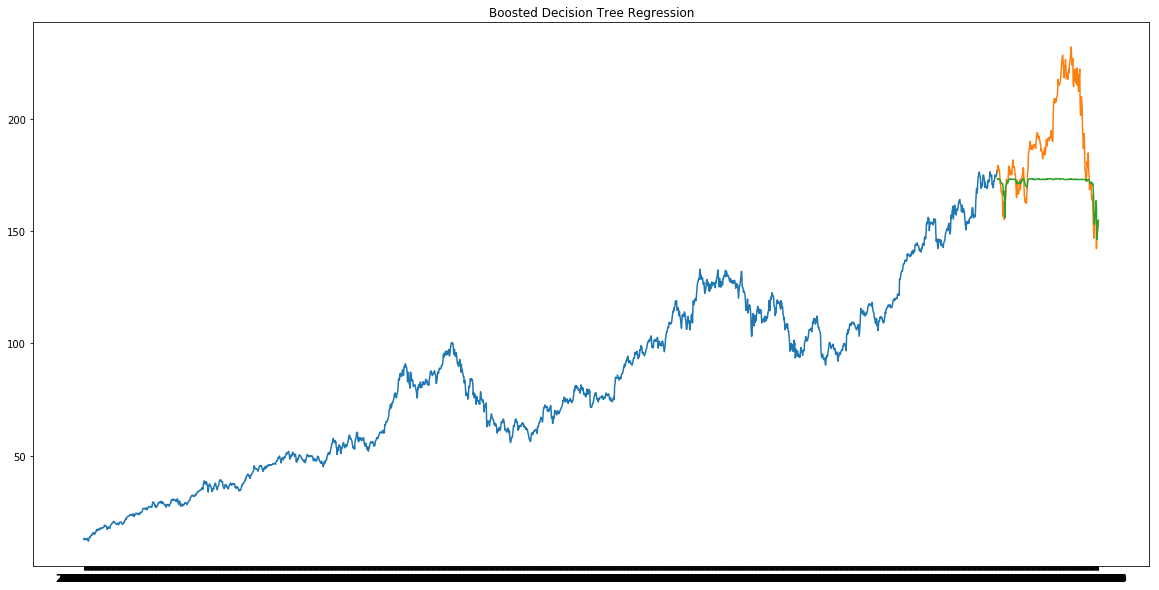

In [32]:
# Using AdaBoostRegression with DecisionTreeRegression
import numpy as np
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import AdaBoostRegressor

# Create the dataset
rng = np.random.RandomState(1)

X_train = X[:2241]
y_train = y[:2241]

X_valid = X[2241:]
y_valid = y[2241:]

# Fit regression model
regr_1 = DecisionTreeRegressor(max_depth=4)

regr_2 = AdaBoostRegressor(DecisionTreeRegressor(max_depth=4),
                          n_estimators=300, random_state=rng)

regr_1.fit(X_train, y_train)
regr_2.fit(X_train, y_train)

# Predict
y_1 = regr_1.predict(X_valid)
y_2 = regr_2.predict(X_valid)
print(mean_squared_error(y_valid,y_2))    

# Plot AdaBoostRegressor regression
valid['Predictions'] = 0
valid['Predictions'] = y_2
valid.index = dataframe[2241:].index
train.index = dataframe[:2241].index
plt.title("Boosted Decision Tree Regression")
plt.plot(train['label_price'])
plt.plot(valid[['label_price', 'Predictions']])
